In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [17]:
data = pd.read_csv('creditcard.csv')

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
data.shape

(284807, 31)

In [19]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [21]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [22]:
fraud_data = data[data.Class == 1]
n_fraud_data = data[data.Class == 0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


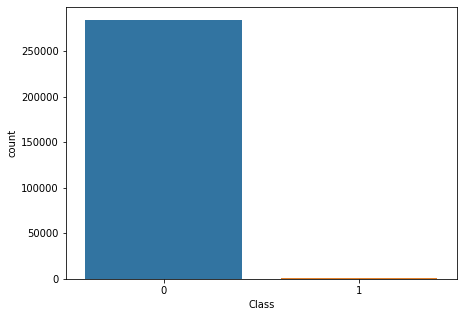

In [23]:
plt.figure(figsize = (7,5))
sns.countplot('Class', data = data)

Data is heavily imbalanced(0.00172% fraud data). It should be balanced to avoid bias that weakens the minority class

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


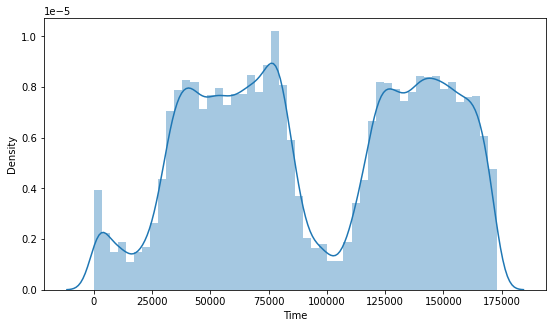

In [25]:

plt.figure(figsize = (9,5))
sns.distplot(data['Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


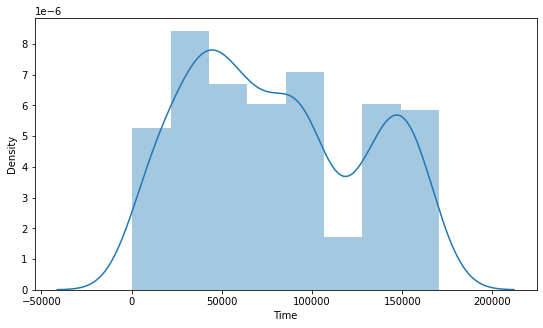

In [26]:
#fraud transactions time distribution
plt.figure(figsize = (9,5))
sns.distplot(fraud_data['Time'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


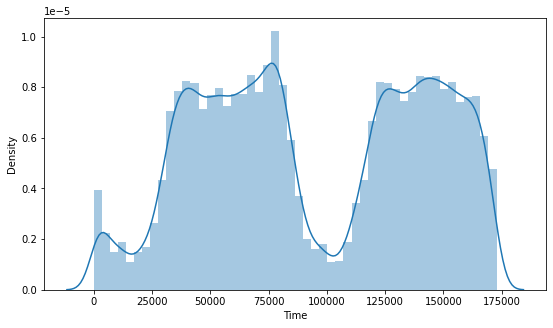

In [27]:
  #Normal transactions time distribution
plt.figure(figsize = (9,5))
sns.distplot(n_fraud_data['Time'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Normal Transactions')

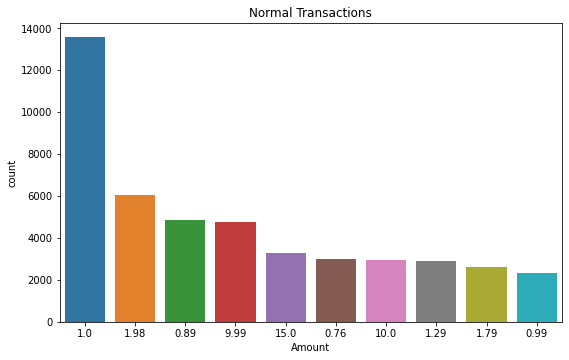

In [28]:
plt.figure(figsize = (9,5.5))
sns.countplot('Amount', order = n_fraud_data['Amount'].value_counts().index[:10], data = n_fraud_data)
plt.title('Normal Transactions')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Fraud Transactions')

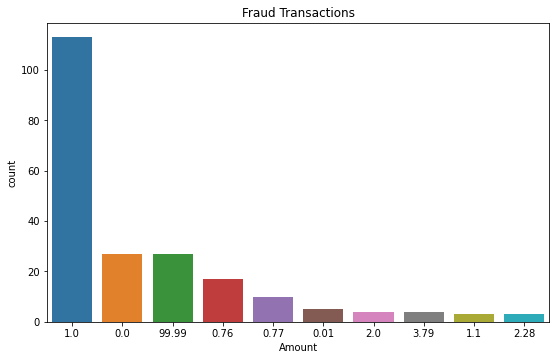

In [29]:
plt.figure(figsize = (9,5.5))
sns.countplot('Amount', order = fraud_data['Amount'].value_counts().index[:10], data = fraud_data)
plt.title('Fraud Transactions')

1. It is quite interesting to see that 99.99 dollars is in top 3 of fraud transactions but not in Normal transactions and It has same frequency of 0 dollars
2.Fraudsters still does the transaction with this amount even it is such a large money to be unnoticed by the customer .

## Undersampling

In [30]:
# scaling the amount and time feature using minmaxscaler
m = MinMaxScaler()
data['scaled_amount'] = m.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = m.fit_transform(data['Time'].values.reshape(-1,1))
data.drop(['Amount', 'Time'], axis = 1, inplace= True)

In [31]:
majority_class = n_fraud_data.index
minority_class = fraud_data.index

In [32]:
minority_class_len = len(minority_class)
minority_class_len

492

In [33]:
random_majority_index = np.random.choice(majority_class, minority_class_len, replace = False)
len(random_majority_index)

492

In [34]:
under_sampled_index = np.concatenate([random_majority_index,minority_class])

In [35]:
under_sampled_data = data.loc[under_sampled_index]
under_sampled_data.index = range(0, len(under_sampled_data))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


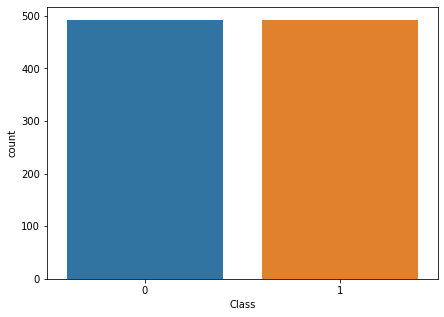

In [36]:
plt.figure(figsize = (7,5))
sns.countplot('Class', data = under_sampled_data)

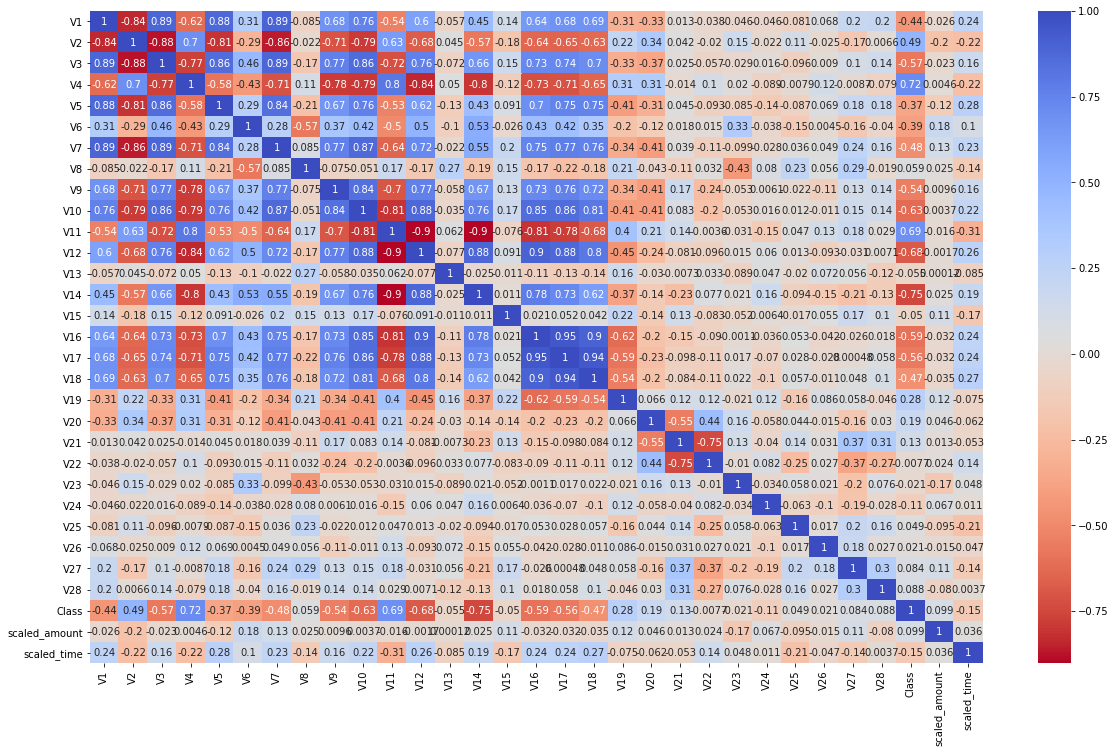

In [37]:
# correlation on under sampled data
plt.figure(figsize = (20,12))
cor = under_sampled_data.corr()
sns.heatmap(cor, cmap='coolwarm_r', annot=True)

In [38]:
X = under_sampled_data.drop('Class', axis= 1)
y = under_sampled_data['Class']

In [39]:

#splitting the data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33, random_state = 42, stratify = y)

In [40]:
#train data
print('Non-fraud data is', len(y_train[y_train == 0]))
print('fraud data is',len(y_train[y_train == 1]))

Non-fraud data is 329
fraud data is 330


## Feature selection

In [41]:
X1 = data.drop('Class', axis= 1)
y1 = data['Class']

In [42]:
sm = SMOTE(random_state=42, ratio = 1)
X_new, y_new = sm.fit_sample(X1,y1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [43]:

#after sampling
print('Non-fraud data is', len(y_new[y_new == 0]))
print('fraud data is',len(y_new[y_new == 1]))

Non-fraud data is 284315
fraud data is 284315


In [44]:
X1_df = data.drop('Class', axis= 1)
Smote_data = pd.DataFrame(X_new, columns= X1_df.columns)
Smote_data['Class'] = y_new

In [46]:
rf_clf = RandomForestClassifier()
rf = rf_clf.fit(X_new,y_new)

In [47]:
fimp_col = []
fimp = []
for i,column in enumerate(X1):
    fimp_col.append(column)
    fimp.append(rf.feature_importances_[i])

In [48]:
fimp_df = pd.DataFrame(zip(fimp_col,fimp), columns = ['Features', 'Feature Importance'])
fimp_df = fimp_df.sort_values('Feature Importance', ascending = False).reset_index()

In [49]:
fimp_df['F_imp_cumulative'] = fimp_df['Feature Importance'].cumsum()
fimp_df

,index,Features,Feature Importance,F_imp_cumulative
0,9,V10,0.168559,0.168559
1,13,V14,0.162379,0.330938
2,3,V4,0.108790,0.439728
3,11,V12,0.095813,0.535541
4,16,V17,0.081539,0.617080
5,10,V11,0.072820,0.689900
6,2,V3,0.040679,0.730579
7,15,V16,0.035258,0.765837
8,6,V7,0.029198,0.795035
9,1,V2,0.023160,0.818195


In [50]:
Not_important_features = list(fimp_df['Features'][12:])
print(Not_important_features)

['V27', 'V21', 'V18', 'V6', 'V5', 'V1', 'V13', 'scaled_amount', 'V19', 'V28', 'V20', 'V26', 'V15', 'scaled_time', 'V23', 'V22', 'V25', 'V24']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Feature Importance-SMOTE Data')

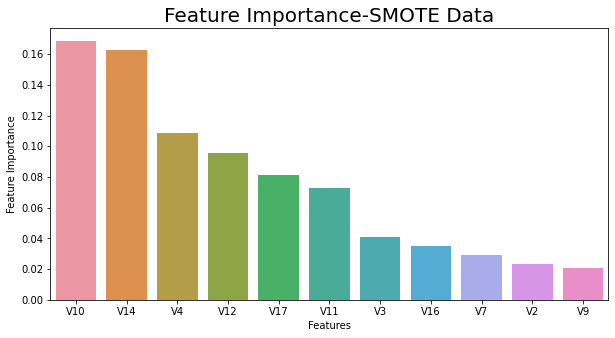

In [51]:
# top 10 features based on feature importance
plt.figure(figsize = (10,5))
sns.barplot('Features','Feature Importance', data = fimp_df[:11])
plt.title('Feature Importance-SMOTE Data',size = 20)

From above graphs we can see these 11 features covers 85% of variance in the data

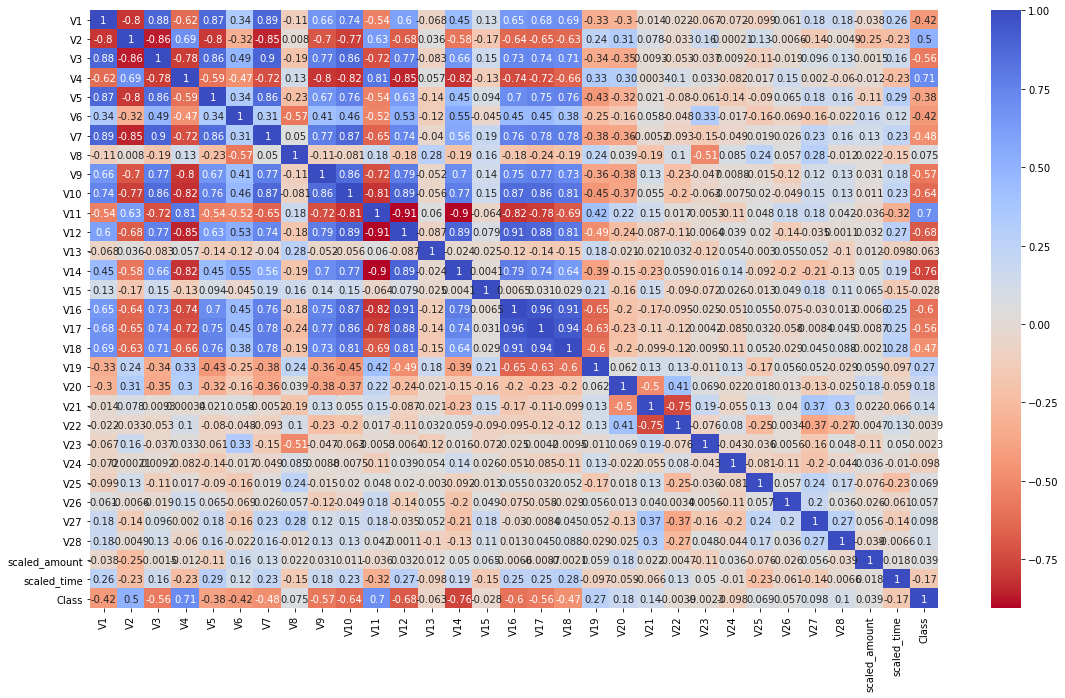

In [53]:
# correlation on SMOTE data
plt.figure(figsize = (19,11))
cor1 = Smote_data.corr()
sns.heatmap(cor1, cmap='coolwarm_r', annot = True)

1. V9,V10,V12,V14,V16,V17 are negatively correlated with the class
2.V2,V4,V11 are Positively Correlated with the class

In [54]:
# dropping the insignificant features
Final_data = data.drop(Not_important_features, axis=1)

In [55]:
Final_data.head(5)

,V2,V3,V4,V7,V8,V9,V10,V11,V12,V14,V16,V17,Class
0,-0.072781,2.536347,1.378155,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.266151,0.166480,0.448154,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,-1.340163,1.773209,0.379780,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,-0.185226,1.792993,-0.863291,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,0.877737,1.548718,0.403034,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


## Cross Validation - Under sampled data

In [56]:
skfold = StratifiedKFold(n_splits = 5)
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
cv_performance_metrics = list(['Fit_time','score_time','test_accuracy', 'test_Ppecision', 'test_recall', 'test_F1'])

In [57]:
# Algorithms
log_reg = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

# parameters
kfold = KFold(n_splits = 5)
algo_list = list([log_reg,knn,svc,d_tree,rf_clf])
algo_name = list(['Logistic regression','K Nearest Neighbor','Support vector classifier', 'Decision Tree', 'Random Forest'])
performance_metrics = list(['Accuracy', 'Precision', 'Recall', 'F1','AUC_ROC_Score'])

In [58]:
# cross validation on various algorithms
def cross_validation(algo,X,y,fold,scoring):
    algo_score = []
    for i in algo:
        score = cross_validate(i, X, y, cv = fold, scoring = scoring)
        cv_metrics = dict(zip(cv_performance_metrics,[round(np.mean(score[j]),6) for j in score]))
        algo_score.append(cv_metrics)
    return algo_score

In [59]:
result = cross_validation(algo_list, X, y,skfold,scoring)

In [60]:
cv_score = dict(zip(algo_name,result))
cv_score

{'Decision Tree': {'Fit_time': 0.016411,
  'score_time': 0.004,
  'test_F1': 0.739716,
  'test_Ppecision': 0.791803,
  'test_accuracy': 0.814705,
  'test_recall': 0.739208},
 'K Nearest Neighbor': {'Fit_time': 0.004518,
  'score_time': 0.024339,
  'test_F1': 0.91677,
  'test_Ppecision': 0.968573,
  'test_accuracy': 0.921739,
  'test_recall': 0.872068},
 'Logistic regression': {'Fit_time': 0.024382,
  'score_time': 0.005521,
  'test_F1': 0.918192,
  'test_Ppecision': 0.9603,
  'test_accuracy': 0.921755,
  'test_recall': 0.880045},
 'Random Forest': {'Fit_time': 0.315734,
  'score_time': 0.014097,
  'test_F1': 0.935292,
  'test_Ppecision': 0.973737,
  'test_accuracy': 0.937999,
  'test_recall': 0.900412},
 'Support vector classifier': {'Fit_time': 0.013501,
  'score_time': 0.006306,
  'test_F1': 0.927679,
  'test_Ppecision': 0.981706,
  'test_accuracy': 0.931907,
  'test_recall': 0.880169}}

In [61]:
def model(algo,X_train,y_train, X_test, y_test):
    algo_performance = []
    for i in algo:
        clf = i.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        Accuracy = accuracy_score(y_test, y_pred)
        Precision = precision_score(y_test, y_pred)
        Recall = recall_score(y_test, y_pred)
        F1 = f1_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred)
        metrics = dict(zip(performance_metrics,[Accuracy,Precision,Recall,F1,auc_score]))
        algo_performance.append(metrics)
    return algo_performance

In [62]:
t_result = model(algo_list,X_train, y_train, X_test, y_test)

In [63]:
final_score = dict(zip(algo_name,t_result))
final_score

{'Decision Tree': {'AUC_ROC_Score': 0.9169885632053322,
  'Accuracy': 0.916923076923077,
  'F1': 0.918429003021148,
  'Precision': 0.8994082840236687,
  'Recall': 0.9382716049382716},
 'K Nearest Neighbor': {'AUC_ROC_Score': 0.9630008331439823,
  'Accuracy': 0.963076923076923,
  'F1': 0.9620253164556961,
  'Precision': 0.987012987012987,
  'Recall': 0.9382716049382716},
 'Logistic regression': {'AUC_ROC_Score': 0.963038703325002,
  'Accuracy': 0.963076923076923,
  'F1': 0.9625,
  'Precision': 0.9746835443037974,
  'Recall': 0.9506172839506173},
 'Random Forest': {'AUC_ROC_Score': 0.963038703325002,
  'Accuracy': 0.963076923076923,
  'F1': 0.9625,
  'Precision': 0.9746835443037974,
  'Recall': 0.9506172839506173},
 'Support vector classifier': {'AUC_ROC_Score': 0.9506740892221466,
  'Accuracy': 0.9507692307692308,
  'F1': 0.9490445859872612,
  'Precision': 0.9802631578947368,
  'Recall': 0.9197530864197531}}

## Recall score of models on Undersampled data
    Logistic regression - 0.957
        Knn - 0.932
    Random forest - 0.944
    Decision tree - 0.951
        Svc - 0.925

## SMOTE during Cross-validation
1. we cannot do oversampling before cross validation because when cross validation with oversampled data the both training and validation set will have oversampled minority class.
2. Model will learn about the oversampled data during training and easily predicts the minority class(Fraud transactions) which result in higher precision score on validation set data.
3. This model will not generalize well on test data or unseen data so we need to do Smote oversampling during cross-validation.

In [64]:
new_X = Final_data.drop('Class', axis= 1).values
new_y = Final_data['Class'].values

In [65]:
new_X

array([[-0.07278117,  2.53634674,  1.37815522, ..., -0.31116935,
        -0.47040053,  0.20797124],
       [ 0.26615071,  0.16648011,  0.44815408, ..., -0.1437723 ,
         0.46391704, -0.11480466],
       [-1.34016307,  1.77320934,  0.37977959, ..., -0.16594592,
        -2.89008319,  1.10996938],
       ...,
       [-0.30125385, -3.24963981, -0.55782812, ..., -0.51060184,
         0.14071598,  0.31350179],
       [ 0.53048251,  0.70251023,  0.68979917, ...,  0.44962444,
        -0.60857713,  0.50992846],
       [-0.18973334,  0.70333737, -0.50627124, ..., -0.08431647,
        -0.30262009, -0.66037665]])

In [66]:

# cross validation on various algorithms
def cross_validation(algo,X,y):
    
    algo_performance = []
    
    for train, test in kfold.split(X,y):
    
        x_train = X[train]
        y_train = y[train]
        x_test = X[test]
        y_test = y[test]
        
        sm = SMOTE(random_state=42, ratio = 1.0)
        X_train_sam, y_train_sam = sm.fit_sample(x_train, y_train)
        
        for i in algo:
            clf = i.fit(X_train_sam, y_train_sam)
            y_pred = clf.predict(x_test)
            Accuracy = accuracy_score(y_test, y_pred)
            Precision = precision_score(y_test, y_pred)
            Recall = recall_score(y_test, y_pred)
            F1 = f1_score(y_test, y_pred)
            auc_score = roc_auc_score(y_test, y_pred)
            metrics = dict(zip(performance_metrics,[Accuracy,Precision,Recall,F1,auc_score]))
            algo_performance.append(metrics)
    return algo_performance

In [67]:
#training in SMOTE data with most important features # 9:10 pm
result = cross_validation(algo_list, new_X, new_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [68]:
#oversampled data
cv_score = dict(zip(algo_name,result))
cv_score

{'Decision Tree': {'AUC_ROC_Score': 0.9271020481847331,
  'Accuracy': 0.9939608862048384,
  'F1': 0.43973941368078173,
  'Precision': 0.29540481400437635,
  'Recall': 0.8598726114649682},
 'K Nearest Neighbor': {'AUC_ROC_Score': 0.9566182666480534,
  'Accuracy': 0.9958217759207892,
  'F1': 0.5475285171102661,
  'Precision': 0.3902439024390244,
  'Recall': 0.9171974522292994},
 'Logistic regression': {'AUC_ROC_Score': 0.9645463276142484,
  'Accuracy': 0.9672939854639936,
  'F1': 0.1394919168591224,
  'Precision': 0.075199203187251,
  'Recall': 0.9617834394904459},
 'Random Forest': {'AUC_ROC_Score': 0.9422790673423497,
  'Accuracy': 0.9988939995084443,
  'F1': 0.81524926686217,
  'Precision': 0.7554347826086957,
  'Recall': 0.8853503184713376},
 'Support vector classifier': {'AUC_ROC_Score': 0.8069126304818642,
  'Accuracy': 0.9696113198272532,
  'F1': 0.10450077599586137,
  'Precision': 0.05686936936936937,
  'Recall': 0.643312101910828}}

## Recall score of models on SMOTE data
1. Logistic regression - 0.955
2. Knn - 0.911
3. Random forest - 0.879
4. Decision tree - 0.847
5. Svc - 0.669

## Conclusion
we are going to evaluate model based on Recall and precision scores.

1. Recall – Out of all actual frauds how many frauds my model predicted correctly i.e True positive / (True positive + False Negative ).
2. Precision - Out of all predicted frauds how many frauds my model predicted correctly i.e True Positive / (True positive + False Positive)

## Smote data
1. Since our Logistic Regression model has the highest recall score (0.955) compared to other models it is best in predict the fraud transaction but it has poor precision score (0.08).
2. In terms of maintaining good recall score ( 0.88) and precision score ( 0.76) the Random Forest model performs better than Logistic Regression

##Undersampled data
Logistic regression performs well with excellent recall and precision score of 0.99 and 0.96 respectively followed by Random Forest with excellent precision score of 1 and recall of 0.94.